In [ ]:
#Take Any dataset of your choice and do the visualization
#DATASET LINK-https://www.kaggle.com/datasets/shivamb/netflix-shows
#(SUBMITTED BY-RONAK KUMAR StudentId: CT_CSI_DS_1980)

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df = pd.read_csv('/content/netflix_titles.csv')


In [ ]:
df.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
#Perform Exploratory Data Analysis:
#Check for missing values:

df.isnull().sum()


,0
show_id,0
type,0
title,0
director,2634
cast,825
country,831
date_added,10
release_year,0
rating,4
duration,3


In [ ]:
#Get summary statistics:
df.describe()


,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


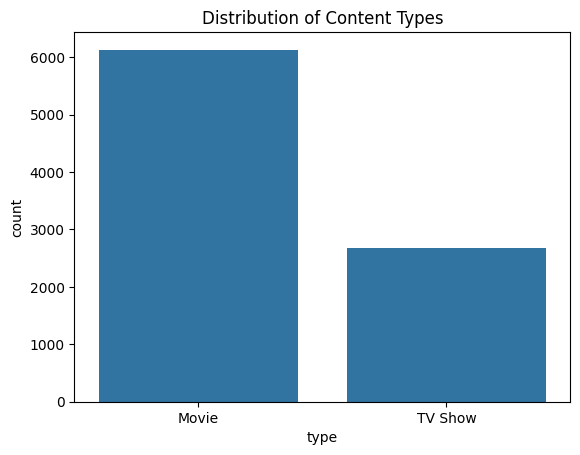

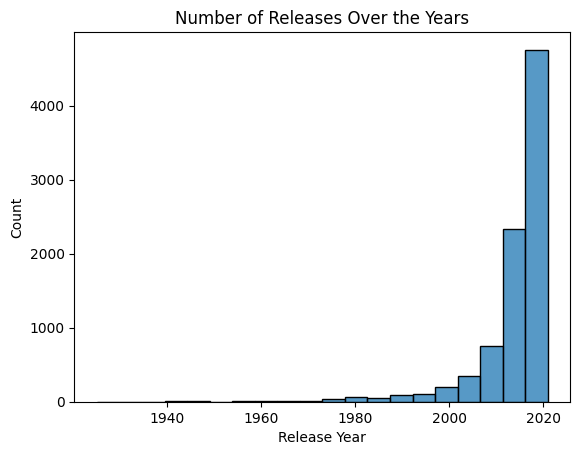

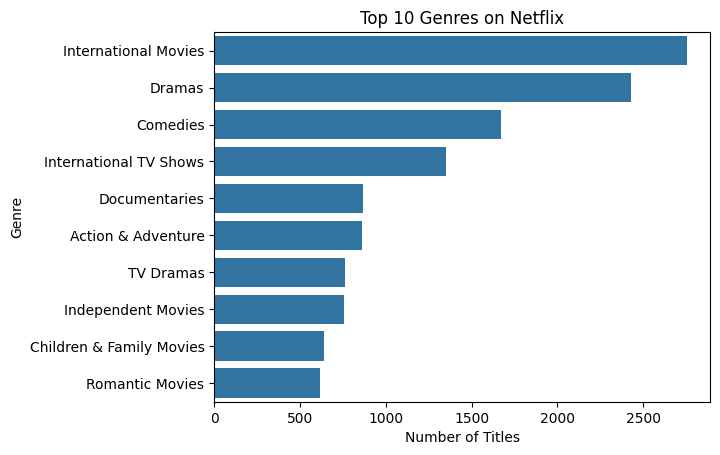

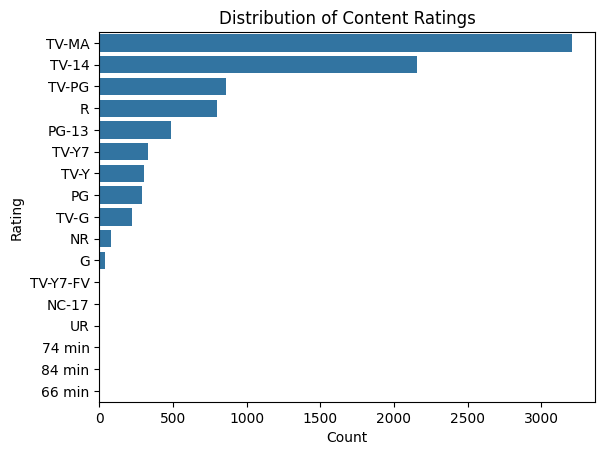

In [ ]:
# Distribution of content types
sns.countplot(x='type', data=df)
plt.title('Distribution of Content Types')
plt.show()

# Number of releases over the years
df['release_year'] = pd.to_numeric(df['release_year'], errors='coerce')
df['release_year'].dropna(inplace=True)
df['release_year'] = df['release_year'].astype(int)
sns.histplot(df['release_year'], bins=20, kde=False)
plt.title('Number of Releases Over the Years')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.show()

# Most common genres
df['listed_in'] = df['listed_in'].astype(str)
genres = df['listed_in'].str.split(', ')
all_genres = [genre for sublist in genres for genre in sublist]
genre_counts = pd.Series(all_genres).value_counts().head(10)
sns.barplot(x=genre_counts.values, y=genre_counts.index)
plt.title('Top 10 Genres on Netflix')
plt.xlabel('Number of Titles')
plt.ylabel('Genre')
plt.show()

# Distribution of content ratings
sns.countplot(y='rating', data=df, order=df['rating'].value_counts().index)
plt.title('Distribution of Content Ratings')
plt.xlabel('Count')
plt.ylabel('Rating')
plt.show()


In [ ]:
import plotly.express as px
fig = px.histogram(df, x='release_year', title='Netflix Releases Over the Years')
fig.show()


In [ ]:
# Drop rows with too many missing values
df_clean = df.dropna(subset=['director', 'cast', 'country'])


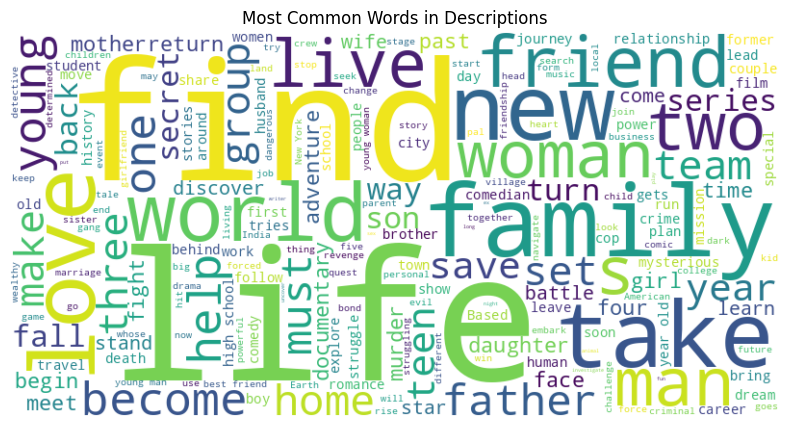

In [ ]:
from wordcloud import WordCloud

text = " ".join(df['description'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in Descriptions')
plt.show()


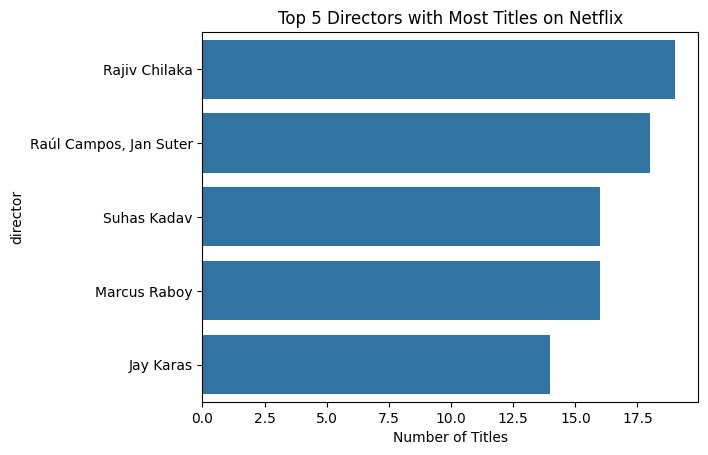

In [ ]:
top_directors = df['director'].value_counts().head(5)
sns.barplot(x=top_directors.values, y=top_directors.index)
plt.title('Top 5 Directors with Most Titles on Netflix')
plt.xlabel('Number of Titles')
plt.show()


In [ ]:
##  Summary of Key Findings
 #Netflix has more movies than TV shows.
 #Most content is produced after 2015.
 #Drama, Comedy, and Documentaries are dominant genres.
 #US is the largest contributor in terms of content.
